In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
from pandas_datareader import data as pdr


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)


In [2]:
stock = pd.read_csv("data.csv")
stock


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Jan-2021,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
1,04-Jan-2021,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
2,05-Jan-2021,14075.15,14215.60,14048.15,14199.50,492475349,30872.87
3,06-Jan-2021,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
4,07-Jan-2021,14253.75,14256.25,14123.10,14137.35,559173512,33446.47
...,...,...,...,...,...,...,...
243,27-Dec-2021,16937.75,17112.05,16833.20,17086.25,144777457,12567.03
244,28-Dec-2021,17177.60,17250.25,17161.15,17233.25,176026100,14553.76
245,29-Dec-2021,17220.10,17285.95,17176.65,17213.60,161679423,14320.79
246,30-Dec-2021,17201.45,17264.05,17146.35,17203.95,320831676,21929.19


In [3]:
# df Close -> arroon_up
i=0
def aroon_upp(row):
        global i
        i=i+1
        if(i>25):
            t=25-(stock['Close'][i-25:i].idxmax()-i+25)
            return (t/25)*100
        else:
            return 0


def aroon_down(row):
        global i
        i=i+1
        if(i>25):
            t=25-(stock['Close'][i-25:i].idxmin()-i+25)
            return (t/25)*100
        else:
            return 0


i=0
stock['aroon_up'] = stock.apply (lambda row: aroon_upp(row), axis=1)

i=0
stock['aroon_down'] = stock.apply (lambda row: aroon_down(row), axis=1)

print(stock['aroon_down'])


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
243    24.0
244    28.0
245    32.0
246    36.0
247    40.0
Name: aroon_down, Length: 248, dtype: float64


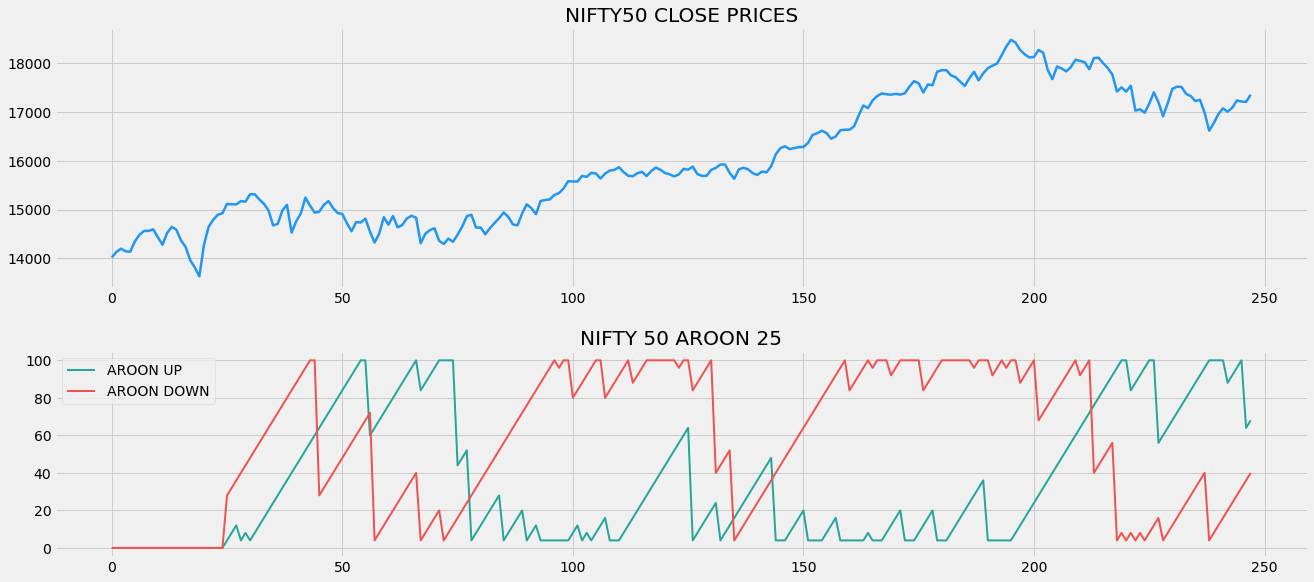

In [4]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(stock['Close'], linewidth = 2.5, color = '#2196f3')
ax1.set_title('NIFTY50 CLOSE PRICES')
ax2.plot(stock['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(stock['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('NIFTY 50 AROON 25')
plt.show()


In [5]:
def implement_aroon_strategy(prices, up, down):
    buy_price = []
    sell_price = []
    aroon_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if up[i] >= 70 and down[i] <= 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        elif up[i] <= 30 and down[i] >= 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            aroon_signal.append(0)
            
    return buy_price, sell_price, aroon_signal



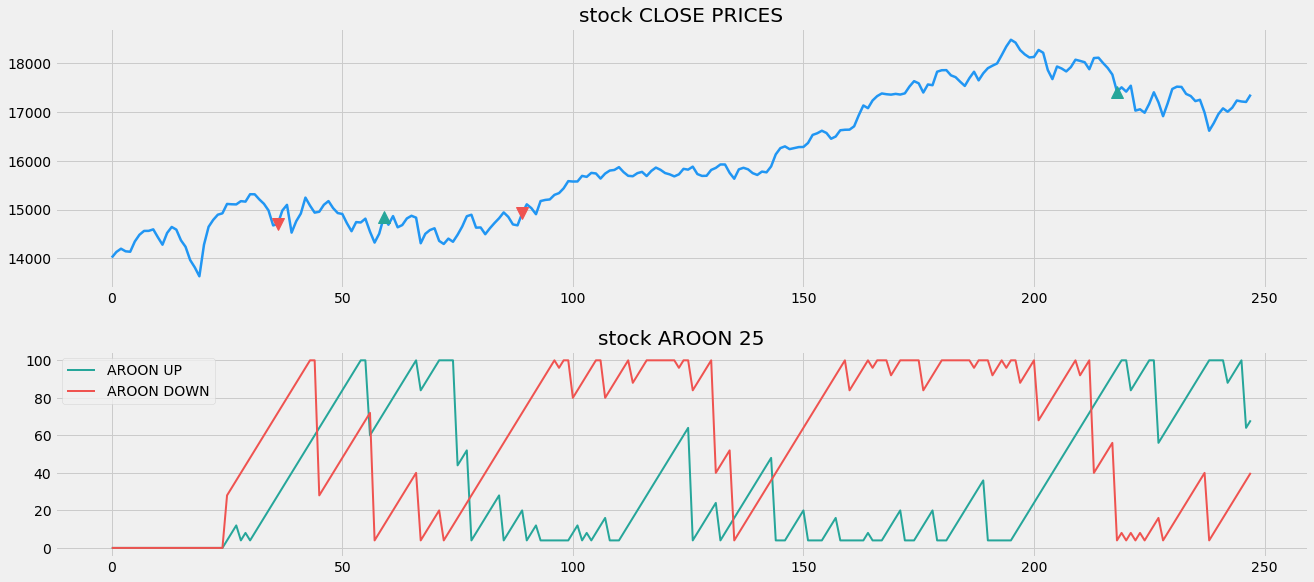

In [6]:
buy_price, sell_price, aroon_signal = implement_aroon_strategy(stock['Close'], stock['aroon_up'], stock['aroon_down'])

ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(stock['Close'], linewidth = 2.5, color = '#2196f3')
ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize = 12)
ax1.plot(stock.index, sell_price, marker = 'v', color = '#ef5350', markersize = 12)
ax1.set_title('stock CLOSE PRICES')
ax2.plot(stock['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(stock['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('stock AROON 25')
plt.show()


In [7]:
position = []
for i in range(len(aroon_signal)):
    if aroon_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(stock['Close'])):
    if aroon_signal[i] == 1:
        position[i] = 1
    elif aroon_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
aroon_up = stock['aroon_up']
aroon_down = stock['aroon_down']
close_price = stock['Close']
aroon_signal = pd.DataFrame(aroon_signal).rename(columns = {0:'aroon_signal'}).set_index(stock.index)
position = pd.DataFrame(position).rename(columns = {0:'aroon_position'}).set_index(stock.index)

frames = [close_price, aroon_up, aroon_down, aroon_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.head()



,Close,aroon_up,aroon_down,aroon_signal,aroon_position
0,14018.50,0.0,0.0,0,1
1,14132.90,0.0,0.0,0,1
2,14199.50,0.0,0.0,0,1
3,14146.25,0.0,0.0,0,1
4,14137.35,0.0,0.0,0,1


In [8]:
print(strategy[43:48])


       Close  aroon_up  aroon_down  aroon_signal  aroon_position
43  15080.75      56.0       100.0             0               0
44  14938.10      60.0       100.0             0               0
45  14956.20      64.0        28.0             0               0
46  15098.40      68.0        32.0             0               0
47  15174.80      72.0        36.0             0               0


In [9]:

stock_ret = pd.DataFrame(np.diff(stock['Close'])).rename(columns = {0:'returns'})
aroon_strategy_ret = []

for i in range(len(stock_ret)):
    returns = stock_ret['returns'][i]*strategy['aroon_position'][i]
    aroon_strategy_ret.append(returns)
    
aroon_strategy_ret_df = pd.DataFrame(aroon_strategy_ret).rename(columns = {0:'aroon_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/stock['Close'].iloc[-1])
aroon_investment_ret = []

for i in range(len(aroon_strategy_ret_df['aroon_returns'])):
    returns = number_of_stocks*aroon_strategy_ret_df['aroon_returns'][i]
    aroon_investment_ret.append(returns)



In [10]:
aroon_investment_ret_df = pd.DataFrame(aroon_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(aroon_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the Aroon strategy by investing $100k in TSLA : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the Aroon strategy : {}%'.format(profit_percentage), attrs = ['bold']))


Profit gained from the Aroon strategy by investing $100k in TSLA : 3524.25
Profit percentage of the Aroon strategy : 3%


def get_benchmark(start_date, investment_value):
    spy = get_historical_data('SPY', start_date)['close']
    benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})
    
    investment_value = investment_value
    number_of_stocks = floor(investment_value/spy[-1])
    benchmark_investment_ret = []
    
    for i in range(len(benchmark['benchmark_returns'])):
        returns = number_of_stocks*benchmark['benchmark_returns'][i]
        benchmark_investment_ret.append(returns)

    benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
    return benchmark_investment_ret_df

benchmark = 4('2020-01-01', 100000)

investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
print(cl('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret), attrs = ['bold']))
print(cl('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage), attrs = ['bold']))
print(cl('Aroon Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs = ['bold']))